<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regrewwion model with a regularization factor

In [0]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys

In [0]:
class Ridge_Regression():
  def __init__(self, num_itr=100, lamb=0.01, lr=0.001):
    self.num_itr = num_itr
    self.lamb = lamb
    self.lr = lr
  
  def fit(self, X, y):
    self.w = np.random.random(np.shape(X)[1])
    self.w = np.expand_dims(self.w, axis=1)
    y = np.expand_dims(y, axis=1)
    for i in range(self.num_itr):
      self.w -= self.lr*(X.T.dot(X.dot(self.w) - y) + self.lamb*self.w)
  
  def predict(self, X):
    return X.dot(self.w)

In [0]:
def train_test_split(X, y, test_size):
  y = np.expand_dims(y, axis=1)
  X_y = np.concatenate((X,y), axis = 1)
  print(np.shape(X_y))
  np.random.shuffle(X_y)
  num_line = (int)(test_size*len(X))
  print(num_line)
  return X_y[:num_line, :-1], X_y[num_line:, :-1], \
          X_y[:num_line, -1], X_y[num_line:, -1]

def mean_squared_error(y, pred):
  return np.mean(np.power((y-pred), 2))


(200, 2)
80
Mean Squared Error: 31912.33359169819


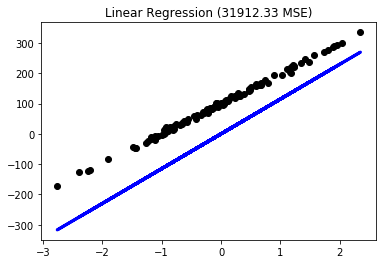

In [0]:
def main():

    X, y = datasets.make_regression(n_features=1, n_samples=200, bias=100, noise=5)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    clf = Ridge_Regression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    # Print the mean squared error
    print ("Mean Squared Error:", mse)

    # Plot the results
    plt.scatter(X_test[:, 0], y_test, color='black')
    plt.plot(X_test[:, 0], y_pred, color='blue', linewidth=3)
    plt.title("Linear Regression (%.2f MSE)" % mse)
    plt.show()

if __name__ == "__main__":
    main()